# Detection of interictal periods in EEG signals using machine learning

## Union of features

### Install requirements

In [ ]:
!pip install -r ../requirements.txt

### Global variables

In [ ]:
PATH_DATASET = "./datasets"
PATH_SCRIPTS = "./scripts"
PATH_RESULTS = "./results"

### Import libraries

In [ ]:
import pandas as pd

## Load Datasets PCA

In [ ]:
Path_PCA_Bonn=PATH_RESULTS+"/features/dataset2_PCA_100.csv"
Path_PCA_Delhi=PATH_RESULTS+"/features/dataset3_PCA_100.csv"


df_Bonn=pd.read_csv(Path_PCA_Bonn)
df_Delhi=pd.read_csv(Path_PCA_Delhi)

In [ ]:
PCA = pd.concat([df_Bonn, df_Delhi], ignore_index=True)
PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,Label
0,-0.910810,-0.432789,1.557870,1.238957,6.244845,5.608685,-0.011796,4.849851,6.243332,1.448628,...,-0.639497,-0.713465,0.450847,0.765167,-0.200125,0.486690,0.266945,-0.279476,-0.217991,1
1,0.669241,-2.770761,2.628015,1.059362,5.188711,8.703730,-2.145227,8.147524,7.337089,0.293559,...,-2.814567,-1.168681,3.382317,-2.202723,0.840620,-0.072660,-0.922332,0.874379,0.700282,1
2,1.796252,2.188240,-0.747876,-1.133820,-3.750040,-2.946909,-1.082376,-1.652842,-2.302908,-1.303553,...,1.717974,-3.321064,-1.665369,-0.964463,-0.325968,1.391561,-0.520153,4.605194,1.315493,1
3,2.203993,2.113146,-0.424998,-1.584056,-5.539428,-5.599065,-0.269519,-3.230361,-5.071597,-1.470821,...,0.560505,-0.296458,0.154894,0.067797,0.046290,1.717703,0.973413,0.269647,-1.709924,1
4,0.535932,1.589788,-0.389449,-1.399532,-2.005868,-2.518123,0.547491,0.839877,-2.527554,-2.759672,...,-1.374583,-3.729957,-3.476771,6.183660,4.606956,-0.231314,0.842094,-1.500779,3.024201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,20.023325,16.020371,6.290595,4.731961,4.266542,6.531234,-11.489270,-5.686753,18.477839,-8.366114,...,0.261904,-0.173095,0.054260,0.093969,-0.048380,-0.014391,-0.015414,0.057839,0.209581,0
646,31.160014,12.274358,6.142229,4.872937,4.144671,0.125958,2.868405,7.321399,9.279057,-0.844818,...,0.194092,-0.205933,0.024402,0.130295,-0.466439,-0.261914,0.273945,0.181950,-0.042100,0
647,0.635756,4.026442,0.969354,-15.829528,-19.835517,7.931998,3.804053,1.651805,4.298282,-16.361731,...,-0.187431,-0.216536,0.164172,0.047884,-0.030293,-0.042051,0.251383,0.142599,-0.000977,0
648,-24.988395,20.037430,11.400389,7.526375,-10.123523,7.438246,-1.055514,0.284052,-2.857728,5.791968,...,0.138705,0.116229,-0.072391,0.477924,-0.411256,-0.055386,-0.119480,-0.103438,0.385972,0


In [ ]:
correlation_matrix = PCA.corr()
correlation_matrix_rounded = correlation_matrix.round(3)
print(correlation_matrix_rounded)


         PC1    PC2    PC3   PC4    PC5    PC6    PC7    PC8    PC9   PC10  \
PC1    1.000  0.000  0.000  0.00  0.000  0.000 -0.000  0.000 -0.000 -0.000   
PC2    0.000  1.000 -0.000  0.00  0.000  0.000 -0.000  0.000 -0.000  0.000   
PC3    0.000 -0.000  1.000  0.00  0.000  0.000 -0.000 -0.000  0.000 -0.000   
PC4    0.000  0.000  0.000  1.00  0.000 -0.000  0.000  0.000 -0.000 -0.000   
PC5    0.000  0.000  0.000  0.00  1.000 -0.000  0.000 -0.000 -0.000  0.000   
...      ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
PC97  -0.000 -0.000  0.000  0.00  0.000  0.000  0.000 -0.000 -0.000  0.000   
PC98   0.000  0.000  0.000  0.00 -0.000 -0.000 -0.000  0.000 -0.000  0.000   
PC99   0.000  0.000  0.000  0.00 -0.000 -0.000 -0.000 -0.000  0.000  0.000   
PC100 -0.000  0.000 -0.000 -0.00 -0.000 -0.000 -0.000 -0.000 -0.000  0.000   
Label  0.037  0.033  0.013 -0.03 -0.046 -0.014 -0.026  0.021  0.009 -0.025   

       ...   PC92   PC93   PC94   PC95   PC96   PC97   PC98   P

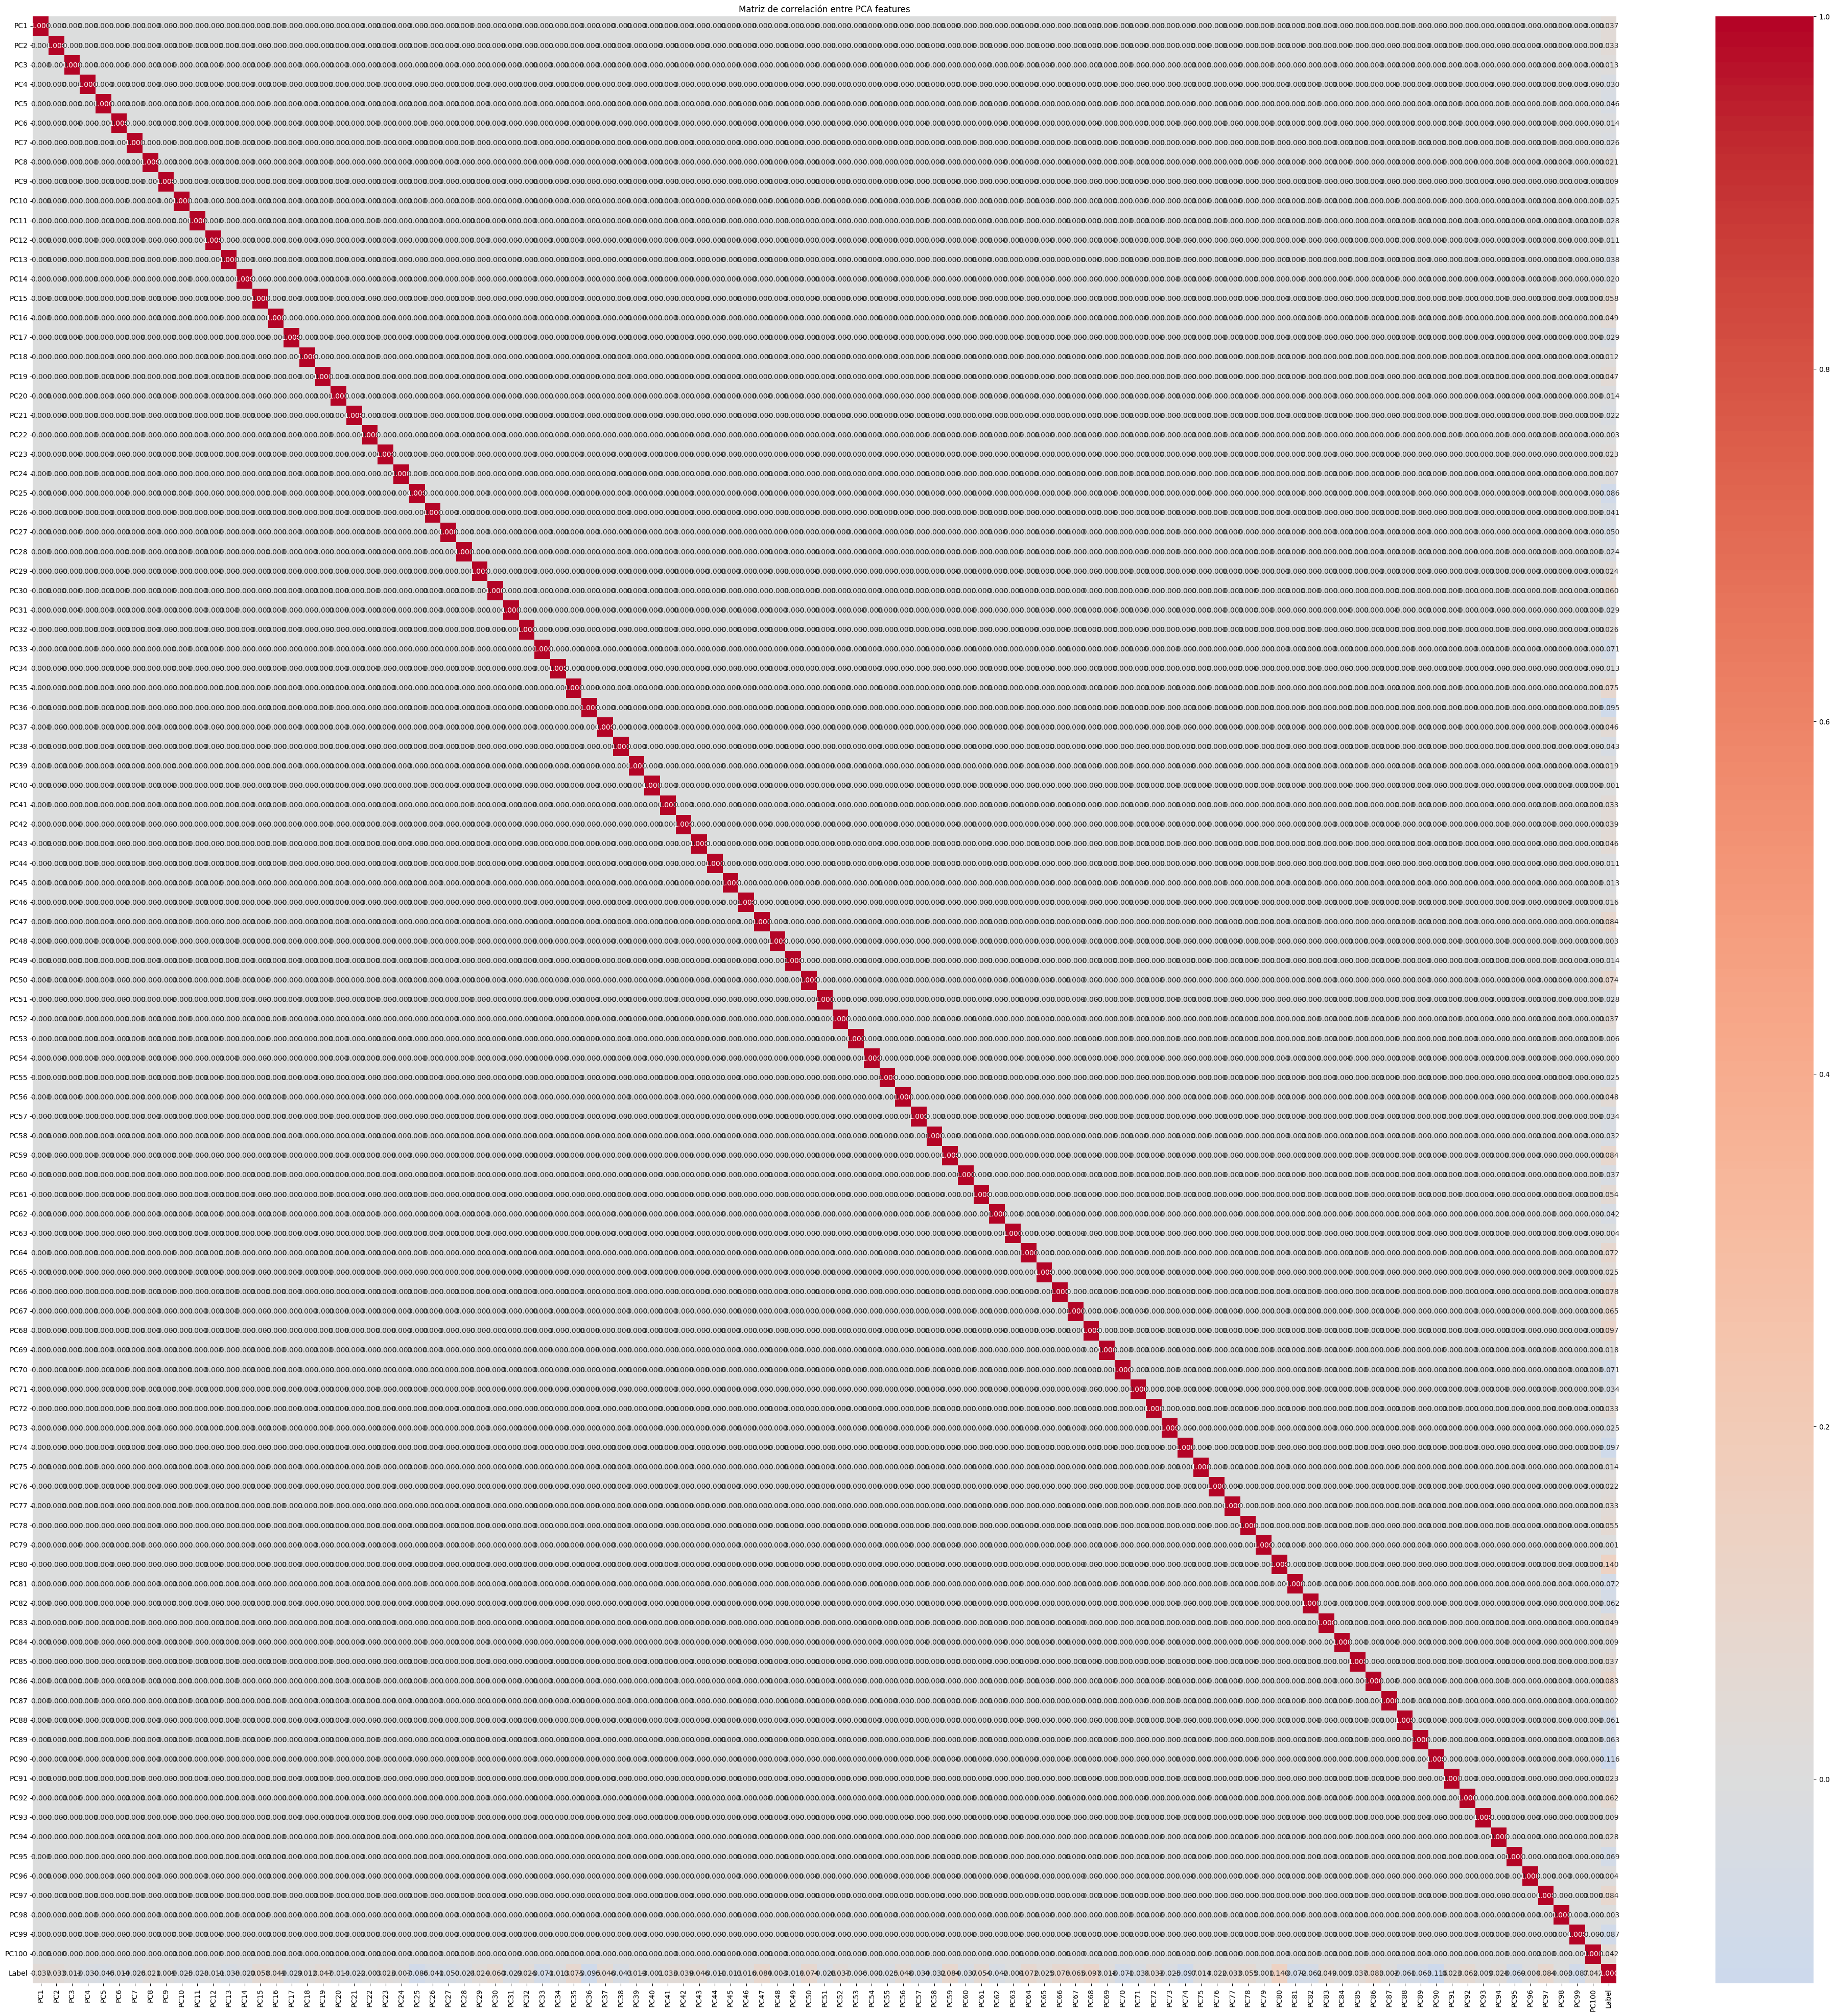

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix_rounded, cmap='coolwarm', center=0, annot=True, fmt=".3f")
plt.title("Matriz de correlación entre PCA features")
plt.show()

PC1      0.037
PC2      0.033
PC3      0.013
PC4     -0.030
PC5     -0.046
         ...  
PC97     0.084
PC98    -0.003
PC99    -0.087
PC100    0.042
Label    1.000
Name: Label, Length: 101, dtype: float64


/tmp/ipython-input-23-3349751422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_corr.values, y=label_corr.index, palette="viridis")


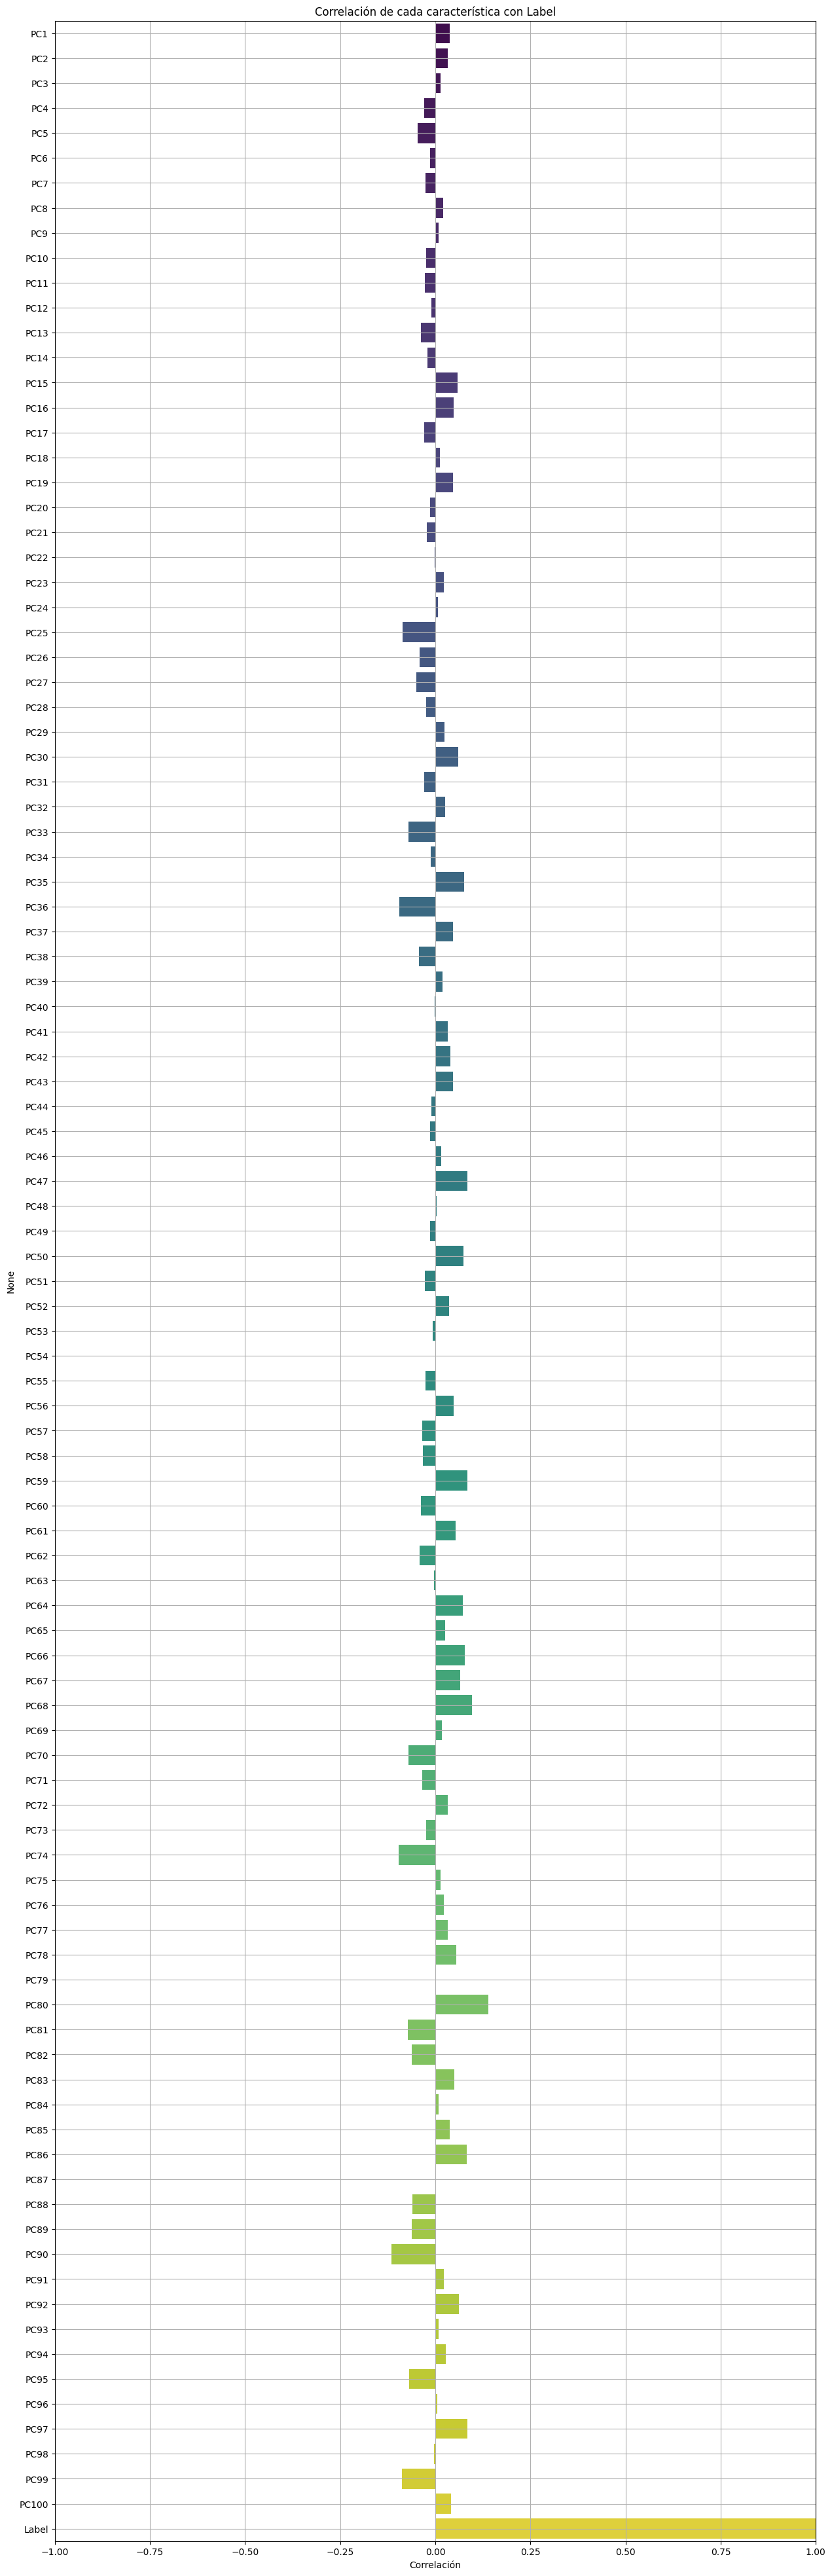

In [ ]:
label_corr = PCA.corr()['Label']
print(label_corr.round(3))
plt.figure(figsize=(15, 50))
sns.barplot(x=label_corr.values, y=label_corr.index, palette="viridis")
plt.title("Correlación de cada característica con Label")
plt.xlabel("Correlación")
plt.xlim(-1, 1)
plt.grid(True)
threshold = 0.2
selected_features = label_corr[abs(label_corr) >= threshold].index.tolist()
filtered_df = PCA[selected_features]
cols = [col for col in filtered_df.columns if col != 'Label'] + ['Label']
filtered_df = filtered_df[cols]

In [ ]:
threshold = 0.10
selected_features = label_corr[abs(label_corr) >= threshold].index.tolist()
filtered_df = PCA[selected_features]
cols = [col for col in filtered_df.columns if col != 'Label'] + ['Label']
filtered_df = filtered_df[cols]

In [ ]:
filtered_df

,PC68,Label
0,-0.940977,0
1,2.652300,0
2,15.978569,0
3,-1.604423,0
4,16.208880,0
...,...,...
645,0.341908,2
646,-1.057252,2
647,0.590946,2
648,0.829574,2


## Loading Classic, pycatch and tsfresh datasets

In [ ]:
Path_Classic = PATH_RESULTS+"/features/EEG_features_Classic.csv"
Path_Pycatch = PATH_RESULTS+"/features/EEG_features_pycatch22.csv"
Path_tsfresh = PATH_RESULTS+"/features/EEG_features_tsfresh.csv"

df_Classic = pd.read_csv(Path_Classic,sep=';')
df_Pycatch = pd.read_csv(Path_Pycatch,sep=';')
df_Tsfresh = pd.read_csv(Path_tsfresh,sep=';')

df_Pycatch = df_Pycatch.drop(columns=['Label'])
df_Tsfresh = df_Tsfresh.drop(columns=['level_0'])
PCA = PCA.drop(columns=['Label'])

In [37]:
df_final=pd.concat([PCA,df_Pycatch,df_Tsfresh,df_Classic],axis=1)
df_final.keys()
for i in df_final.keys():
    print(i)
df_final = df_final.drop(columns=['index'])

PC1
PC2
PC3
PC4
PC5
PC6
PC7
PC8
PC9
PC10
PC11
PC12
PC13
PC14
PC15
PC16
PC17
PC18
PC19
PC20
PC21
PC22
PC23
PC24
PC25
PC26
PC27
PC28
PC29
PC30
PC31
PC32
PC33
PC34
PC35
PC36
PC37
PC38
PC39
PC40
PC41
PC42
PC43
PC44
PC45
PC46
PC47
PC48
PC49
PC50
PC51
PC52
PC53
PC54
PC55
PC56
PC57
PC58
PC59
PC60
PC61
PC62
PC63
PC64
PC65
PC66
PC67
PC68
PC69
PC70
PC71
PC72
PC73
PC74
PC75
PC76
PC77
PC78
PC79
PC80
PC81
PC82
PC83
PC84
PC85
PC86
PC87
PC88
PC89
PC90
PC91
PC92
PC93
PC94
PC95
PC96
PC97
PC98
PC99
PC100
CO_f1ecac
CO_FirstMin_ac
CO_HistogramAMI_even_2_5
SB_BinaryStats_mean_longstretch1
PD_PeriodicityWang_th0_01
CO_Embed2_Dist_tau_d_expfit_meandiff
IN_AutoMutualInfoStats_40_gaussian_fmmi
FC_LocalSimple_mean1_tauresrat
SP_Summaries_welch_rect_area_5_1
SB_MotifThree_quantile_hh
SP_Summaries_welch_rect_centroid
FC_LocalSimple_mean3_stderr
value__partial_autocorrelation__lag_3
index
value__ar_coefficient__coeff_2__k_10
value__lempel_ziv_complexity__bins_3
value__longest_strike_above_mean
value__lempel_ziv_co

In [38]:
df_final.shape

(650, 173)

In [39]:
df_final.to_csv(PATH_RESULTS+"/features/EEG_features_AllFeatures.csv",sep=';', index=False)